In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()


Saving mario.png to mario (1).png


In [7]:
img_bgr = cv2.imread("/content/mario.png",cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img_rgb,cv2.COLOR_RGB2GRAY)

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('mario.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_kernel(ksize, sigma):
    ax = np.arange(-(ksize//2), ksize//2 + 1)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

gk = gaussian_kernel(5, 1.0)
sobel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_y = np.array([[-1,-2,-1],[ 0, 0, 0], [ 1, 2, 1]])

smooth = cv2.filter2D(gray, cv2.CV_64F, gk)

gx = cv2.filter2D(smooth, -1, sobel_x)
gy = cv2.filter2D(smooth, -1, sobel_y)
grad_mag = np.sqrt(gx**2 + gy**2)

if grad_mag.max() > 0:
    grad_mag = (grad_mag / grad_mag.max()) * 255

threshold = 40
edges = np.zeros_like(grad_mag, dtype=np.uint8)
edges[grad_mag > threshold] = 255


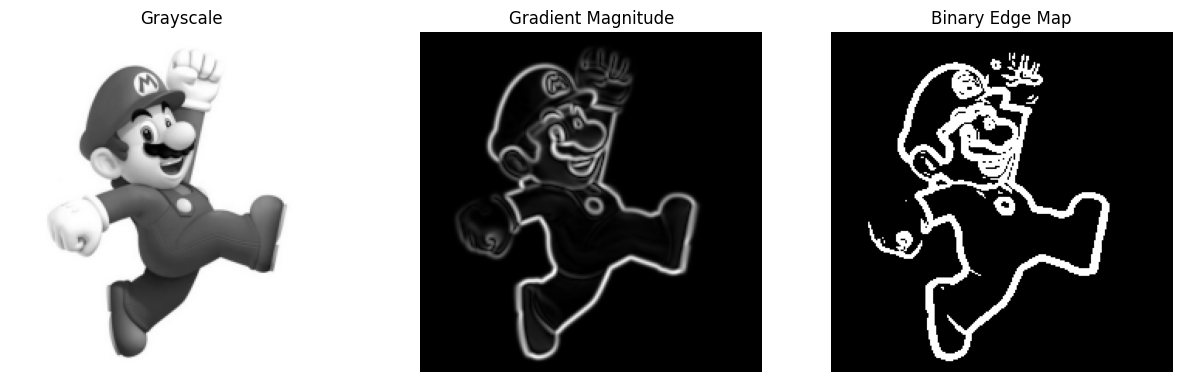

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(gray, cmap='gray')
plt.title("Grayscale")
plt.axis("off")

plt.subplot(1,3,2)
plt.imshow(grad_mag, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis("off")

plt.subplot(1,3,3)
plt.imshow(edges, cmap='gray')
plt.title("Binary Edge Map")
plt.axis("off")

plt.show()